In [127]:
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os 


In [128]:
df=pd.read_csv(r'C:\Users\Preeti kumari\csse.csv')

In [129]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


Field description

1.Province_State - The name of the State within the USA.
2.Country_Region - The name of the Country (US).
3.Last_Update - The most recent date the file was pushed.
4.Lat - Latitude.
5.Long_ - Longitude.
6.Confirmed - Aggregated confirmed case count for the state.
7.Deaths - Aggregated Death case count for the state.
8.Recovered - Aggregated Recovered case count for the state.
9.Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
10.FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
11.Incident_Rate - confirmed cases per 100,000 persons.
12.People_Tested - Total number of people who have been tested.
13.People_Hospitalized - Total number of people hospitalized.
14.Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
15.UID - Unique Identifier for each row entry.
16.ISO3 - Officialy assigned country code identifiers.
17.Testing_Rate - Total number of people tested per 100,000 persons.
18.Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

In [130]:
df["Recovered"]=df["Recovered"].fillna(df["Recovered"].median())
df["Lat"]=df["Lat"].fillna(df["Lat"].median())
df["Long_"]=df["Long_"].fillna(df["Long_"].median())
df["Incident_Rate"]=df["Incident_Rate"].fillna(df["Incident_Rate"].median())
df["Testing_Rate"]=df["Testing_Rate"].fillna(df["Testing_Rate"].median())
df["People_Hospitalized"]=df["People_Hospitalized"].fillna(df["People_Hospitalized"].median())
df["Hospitalization_Rate"]=df["Hospitalization_Rate"].fillna(df["Hospitalization_Rate"].median())
df["Mortality_Rate"]=df["Mortality_Rate"].fillna(df["Hospitalization_Rate"].median())
df["People_Tested"]=df["People_Tested"].fillna(df["People_Tested"].median())

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [132]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.916702,-85.301014,26756.086207,1611.017241,5904.137931,20070.724138,3288.086207,391.204822,2.228466e+05,3430.017241,4.615836,7.676194e+07,3879.552237,14.021759
std,10.702145,48.876367,52562.031122,4084.750891,10064.152778,41294.705318,17408.350591,396.463546,2.939333e+05,10024.887841,2.432823,2.378302e+07,1900.557214,3.800090
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.409323,8.400003e+07,3469.782532,13.598326
75%,42.214075,-77.072550,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.620348e+05,1722.750000,5.530335,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,13.598326,8.410000e+07,11377.424693,28.054438


In [133]:
df['Country_Region'].value_counts()

US    58
Name: Country_Region, dtype: int64

In [134]:
df.max()

Province_State                      Wyoming
Country_Region                           US
Last_Update             2020-05-21 02:32:54
Lat                                 61.3707
Long_                               145.674
Confirmed                            354370
Deaths                                28636
Recovered                             61886
Active                               263848
FIPS                                  99999
Incident_Rate                       1821.62
People_Tested                   1.50584e+06
People_Hospitalized                   76410
Mortality_Rate                      13.5983
UID                                84099999
ISO3                                    VIR
Testing_Rate                        11377.4
Hospitalization_Rate                28.0544
dtype: object

In [135]:
df["Recovered"]=df["Confirmed"]-(df["Deaths"]+df["Active"])
#median for testing rate, people tested

In [136]:
df["Hospitalization_Rate"]=(df["People_Hospitalized"]*100)/df["Confirmed"]

In [137]:
from numpy import inf
df.replace(to_replace =inf, 
                 value =0,inplace=True) 
#there was a infinte value replacing that with 0

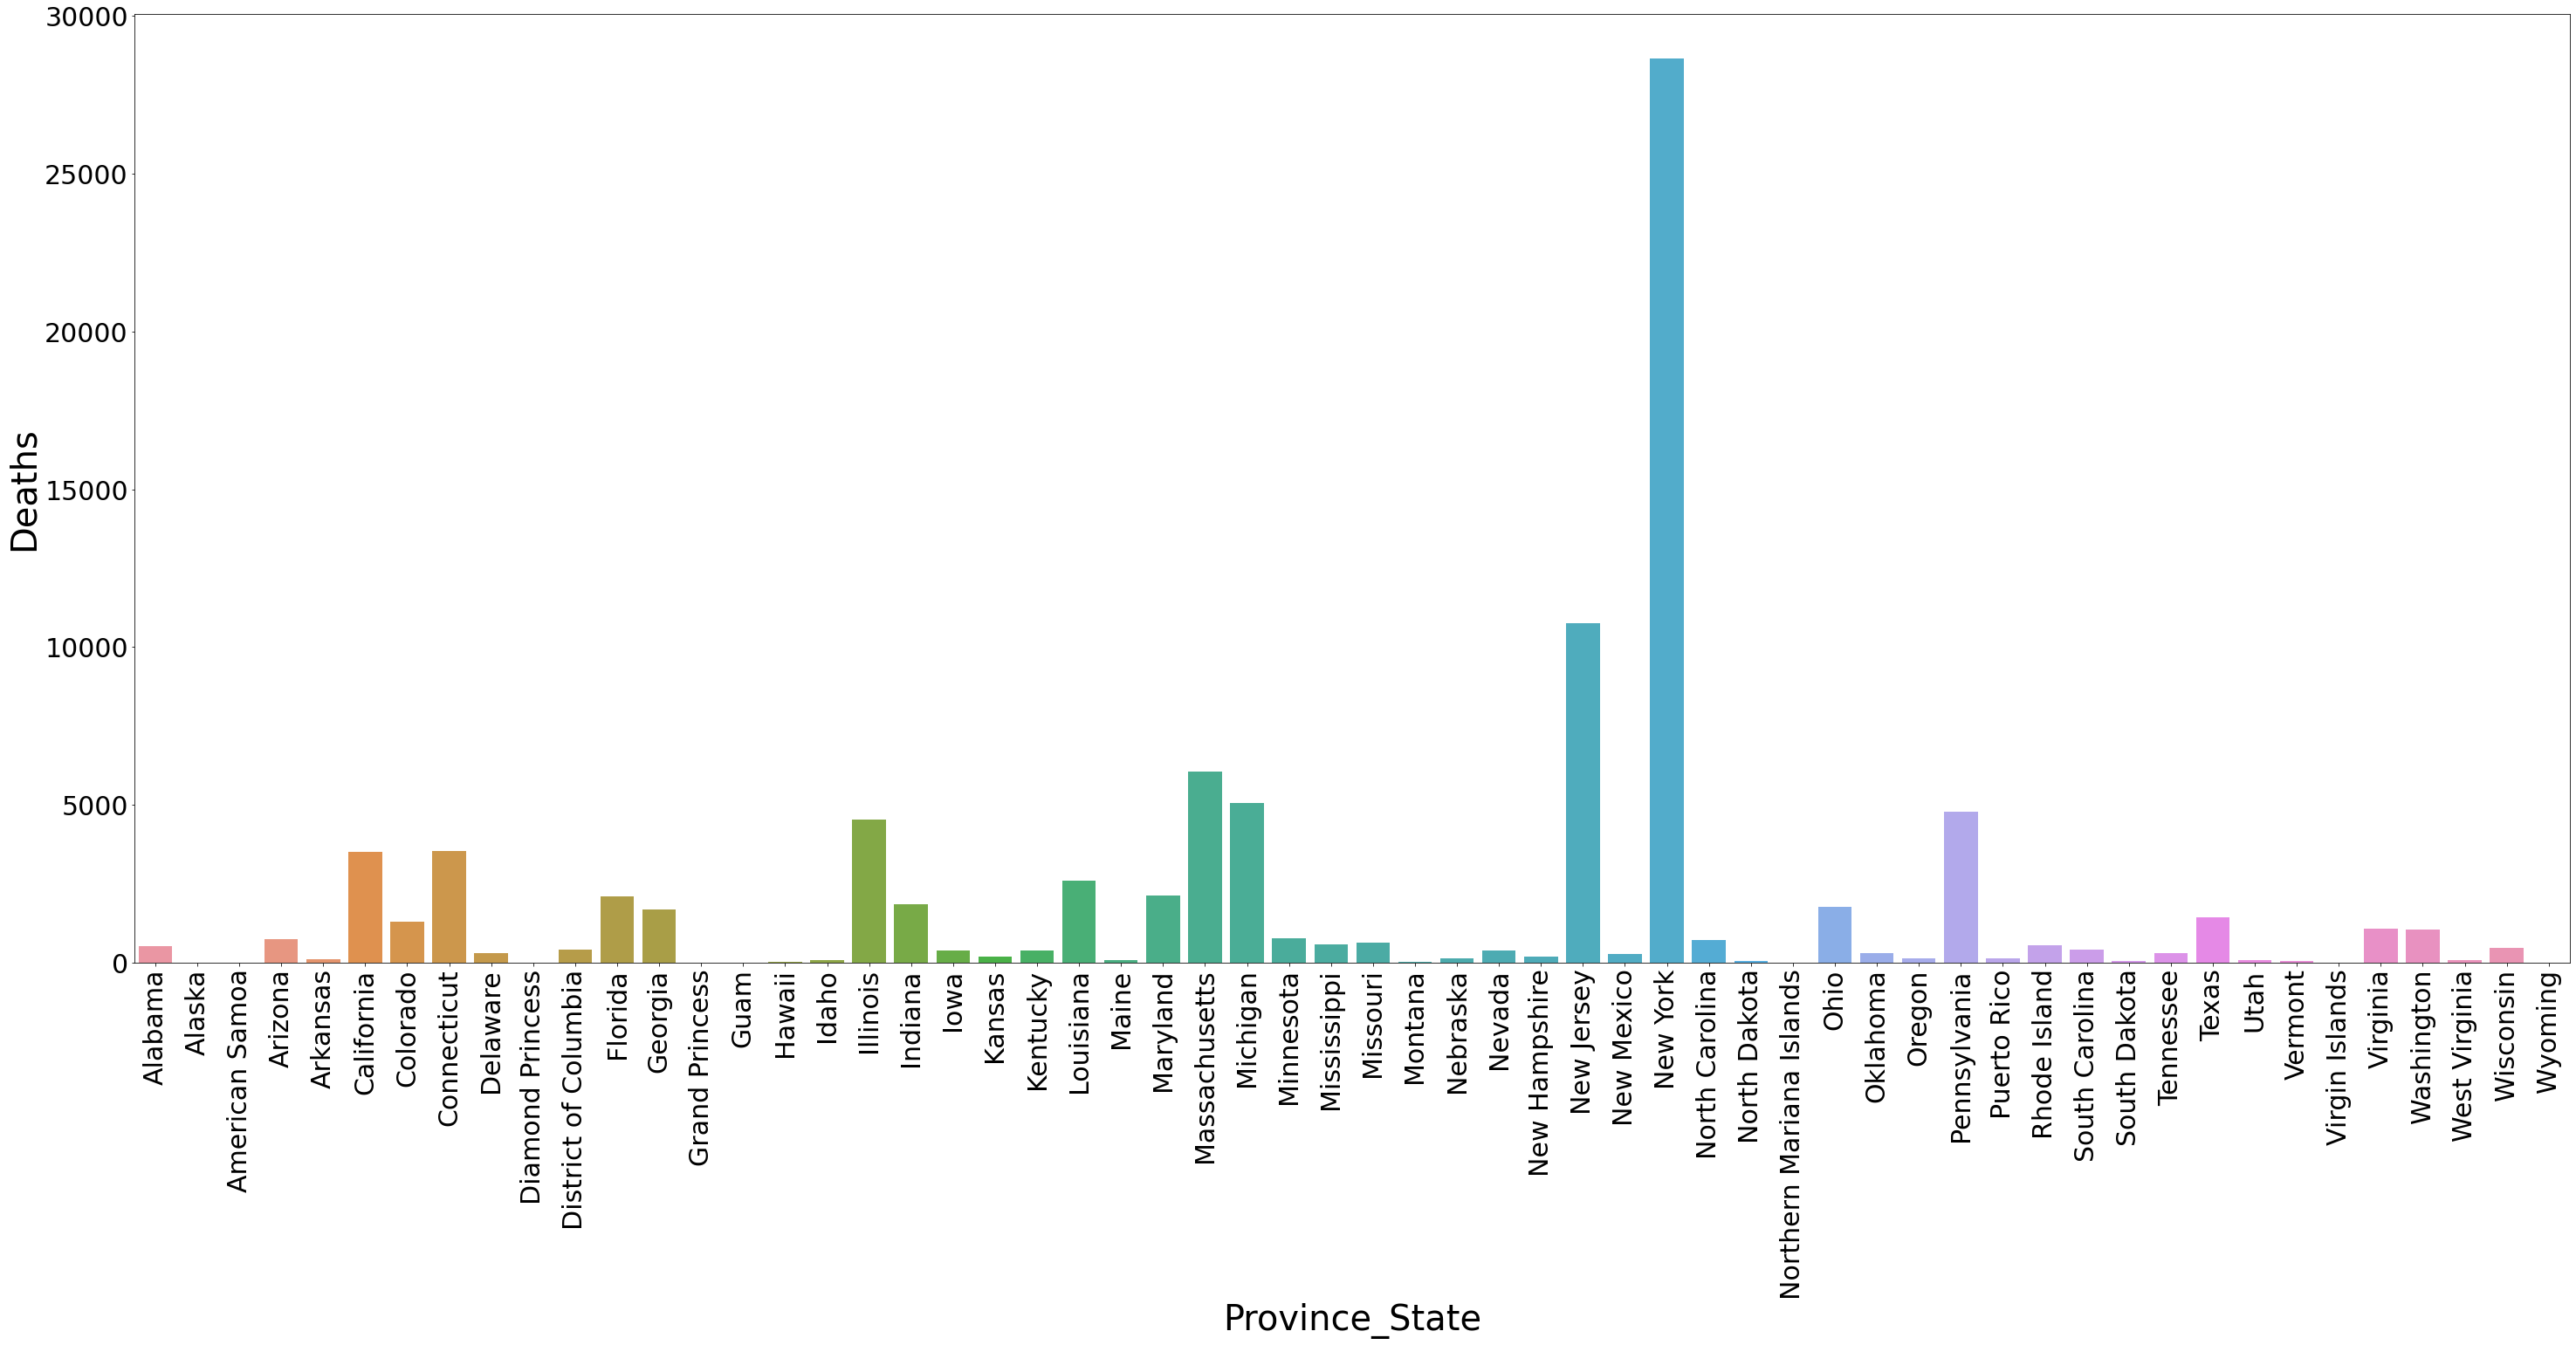

In [138]:
#plotting state and deaths 
plt.figure(figsize=(50,20))
plt.xlabel("Province_State", fontsize=40)
plt.ylabel("Deaths", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=30)
sns.barplot(x="Province_State",y="Deaths",data=df)

Text(0, 0.5, 'Deaths')

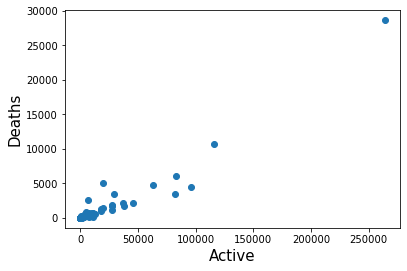

In [139]:
plt.scatter(x=df["Active"],y=df["Deaths"])
plt.xlabel("Active", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Observation:High Positive correlatin between Active and Deaths with few outliers



Text(0, 0.5, 'Deaths')

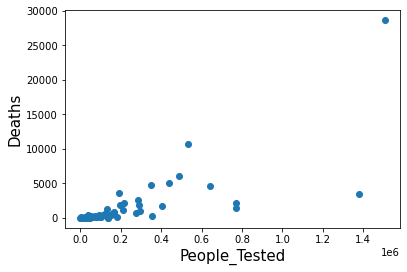

In [140]:
plt.scatter(x=df["People_Tested"],y=df["Deaths"])
plt.xlabel("People_Tested", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

This also has positive relation with few outliers



Text(0, 0.5, 'Deaths')

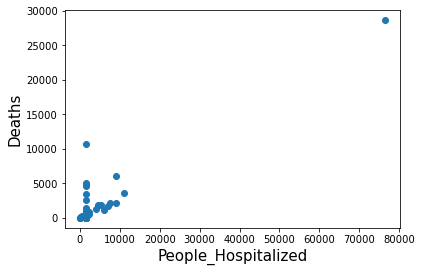

In [141]:
plt.scatter(x=df["People_Hospitalized"],y=df["Deaths"])
plt.xlabel("People_Hospitalized", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Text(0, 0.5, 'Deaths')

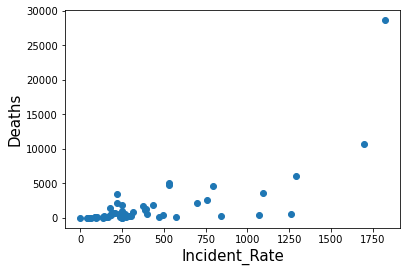

In [142]:
plt.scatter(x=df["Incident_Rate"],y=df["Deaths"])
plt.xlabel("Incident_Rate", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Observation: Positive correlation between the two



Text(0, 0.5, 'Deaths')

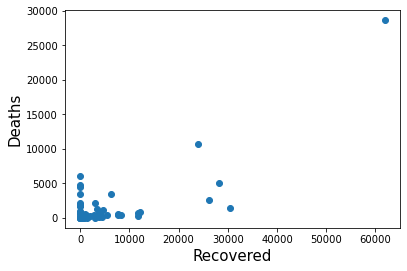

In [143]:
plt.scatter(x=df["Recovered"],y=df["Deaths"])
plt.xlabel("Recovered", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

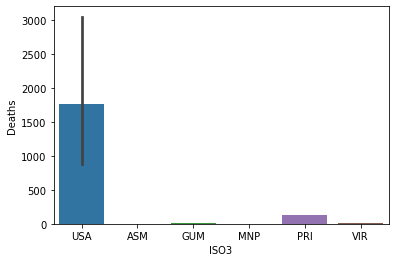

In [144]:
sns.barplot(x="ISO3",y="Deaths",data=df)


Observation:ISO3 refers to the country code identifier and mostly the regions is USA so this column is not that important



In [145]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["Province_State"] = labelencoder.fit_transform(df["Province_State"])

In [146]:
corr_matrix=df.corr()
corr_matrix["Deaths"].sort_values(ascending=False)


Deaths                  1.000000
Confirmed               0.982191
Active                  0.954378
People_Hospitalized     0.899983
Recovered               0.782292
People_Tested           0.742632
Incident_Rate           0.713560
Testing_Rate            0.347261
Mortality_Rate          0.345540
UID                     0.120043
Lat                     0.116727
Long_                   0.029463
Province_State          0.015229
FIPS                   -0.075053
Hospitalization_Rate   -0.100068
Name: Deaths, dtype: float64

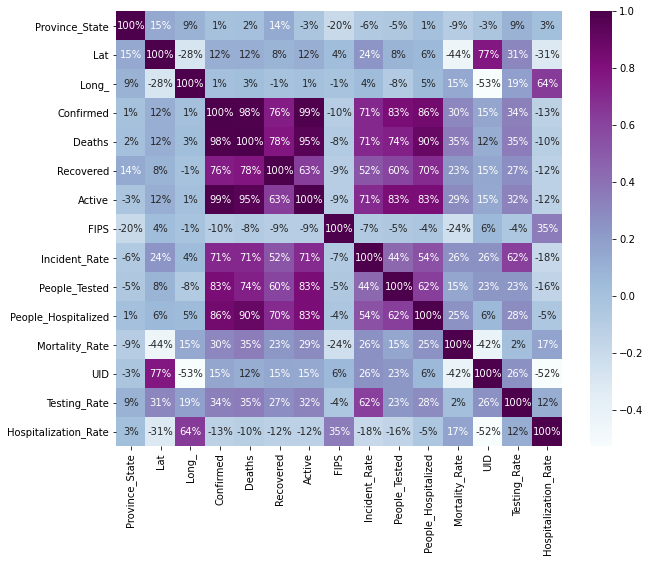

In [147]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='BuPu')
plt.show()

In [148]:
df.drop(columns=["FIPS","ISO3","Province_State","Lat","Long_","Hospitalization_Rate","Country_Region","Last_Update"],axis=1,inplace=True)
#dropping columns with poor correlation with death also some columns like Country_Region and last_update have same value

In [149]:
df.skew()

Confirmed              4.708614
Deaths                 5.489201
Recovered              3.649556
Active                 4.180953
Incident_Rate          2.012296
People_Tested          2.847892
People_Hospitalized    7.015366
Mortality_Rate         1.088541
UID                   -3.027480
Testing_Rate           1.333601
dtype: float64

In [150]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [151]:
df.skew()


Confirmed             -1.374603
Deaths                -0.568714
Recovered             -0.591539
Active                -0.994488
Incident_Rate         -1.783566
People_Tested         -1.619104
People_Hospitalized   -0.074706
Mortality_Rate        -0.763778
UID                   -3.027480
Testing_Rate          -2.953045
dtype: float64

In [152]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
new_df=df[(z < 3).all(axis=1)]
#removing outliers
print(df.shape,"  ",new_df.shape)
#one row dropped

(58, 10)    (51, 10)


In [153]:
x_d=new_df.drop("Deaths",axis=1)
y=new_df["Deaths"]
#splitting into input and output

In [154]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_d)
x=sc.transform(x_d)
x=pd.DataFrame(x,columns=x_d.columns)
#using standard scaler to bring all the values in a single scale

In [155]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x_d, y,random_state = 45,test_size=0.20)


In [157]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso()]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m, "is:",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(y_test,predm))
    print("Mean squared error:",mean_squared_error(y_test,predm))
    print("r2 score :",r2_score(y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.9996974324822429
ERROR:
 Mean absolute error: 0.02164089478361147
Mean squared error: 0.0009187746815837642
r2 score : 0.9996326055550986


score of  DecisionTreeRegressor() is: 1.0
ERROR:
 Mean absolute error: 0.4765466132447227
Mean squared error: 0.36608671038811286
r2 score : 0.8536113081425116


score of  KNeighborsRegressor() is: 0.49010215471672314
ERROR:
 Mean absolute error: 1.1580320576435186
Mean squared error: 2.314654480449764
r2 score : 0.07442900307446443


score of  SVR() is: -0.0036426492248800013
ERROR:
 Mean absolute error: 1.2986054241748348
Mean squared error: 2.578473063800269
r2 score : -0.031065286143061366


score of  Lasso() is: 0.7994853108615215
ERROR:
 Mean absolute error: 0.5342256576175595
Mean squared error: 0.4563594866853857
r2 score : 0.8175135387957592




# Evaluting DecisionTreeRegressor as it's accuracy is not too high and r2 score is maximum among all with less error¶


In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
score=cross_val_score(dt,x_d,y,cv=5,scoring="r2")
ypre=dt.predict(x_test)
score.mean()


0.7550043506308762

In [166]:
model=[DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m, "is:",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(y_test,predm))
    print("Mean squared error:",mean_squared_error(y_test,predm))
    print("r2 score :",r2_score(y_test,predm))
    print("\n")


score of  DecisionTreeRegressor() is: 1.0
ERROR:
 Mean absolute error: 0.5792560837706183
Mean squared error: 0.6497882940637938
r2 score : 0.7401663167410175




In [169]:
df_deaths=pd.DataFrame(y_test)

In [170]:
df_deaths.to_csv('Output_Deaths.csv')

In [173]:
import joblib
joblib.dump(model,"deaths.skl")


['deaths.skl']